<a href="https://colab.research.google.com/github/FaisalAhmedBijoy/Deep-CNN-Architecture-Implementation/blob/main/Complex_New_Model_KUET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
import glob

## Mount Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_path='/content/drive/My Drive/CSE 4000 Thesis/Dataset1500/train'
test_path='/content/drive/My Drive/CSE 4000 Thesis/Dataset1500/test'

In [4]:
print(os.listdir(train_path))
print(os.listdir(test_path))

['building_house', 'mosque', 'temple', 'tinshed', 'mud_house', 'sky_building']
['mud_house', 'building_house', 'mosque', 'sky_building', 'temple', 'tinshed']


## Dataset Preparatin using ImageDataGenerator

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
WIDTH=224
HEIGHT=224

In [7]:
train_generator = ImageDataGenerator(rescale=1./255,
                                    horizontal_flip=True,
                                    shear_range=0.1 ,
                                    zoom_range=0.1,
                                    rotation_range=20,
                                    height_shift_range=0.1,
                                    fill_mode='nearest',
                                    validation_split=0.2)
                                     
train_dataset = train_generator.flow_from_directory(batch_size=32,
                                                 directory=train_path,
                                                 shuffle=True,
                                                 seed=42,
                                                 target_size=(WIDTH, HEIGHT),
                                                 class_mode='categorical',
                                                 subset='training')

validation_dataset = train_generator.flow_from_directory(batch_size=32,
                                                 directory=train_path,
                                                 shuffle=True,
                                                 seed=42,
                                                 target_size=(WIDTH, HEIGHT), 
                                                 class_mode='categorical',
                                                 subset='validation')

Found 960 images belonging to 6 classes.
Found 240 images belonging to 6 classes.


In [8]:
test_generator=ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory(batch_size=32,
                                                 directory=test_path,
                                                 shuffle=True,
                                                  seed=42,
                                                 target_size=(WIDTH, HEIGHT), 
                                                 class_mode='categorical')

Found 300 images belonging to 6 classes.


In [9]:
train_dataset.class_indices

{'building_house': 0,
 'mosque': 1,
 'mud_house': 2,
 'sky_building': 3,
 'temple': 4,
 'tinshed': 5}

In [10]:
validation_dataset.class_indices

{'building_house': 0,
 'mosque': 1,
 'mud_house': 2,
 'sky_building': 3,
 'temple': 4,
 'tinshed': 5}

In [11]:
total_class=len(train_dataset.class_indices)
print('Number of classes in dataset: ',total_class)

Number of classes in dataset:  6


## Plot some random image
- class 0: building house
- class 1: mosque
- class 2: mud house
- class 3: sky building
- class 4: temple
- class 5: tinshed

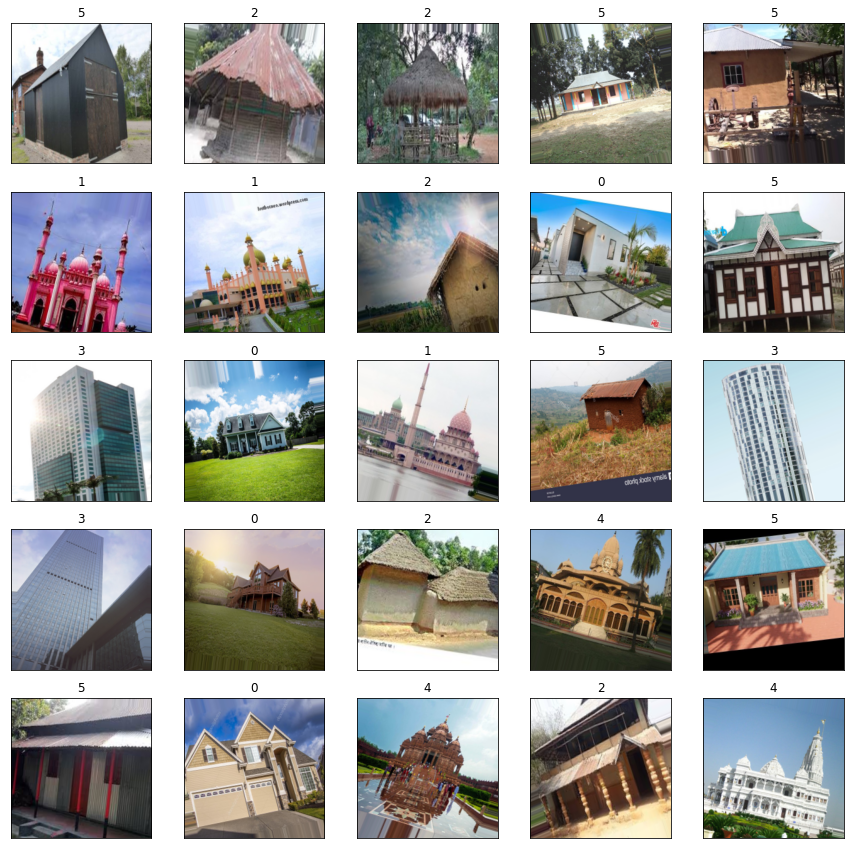

In [12]:
x,y=train_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

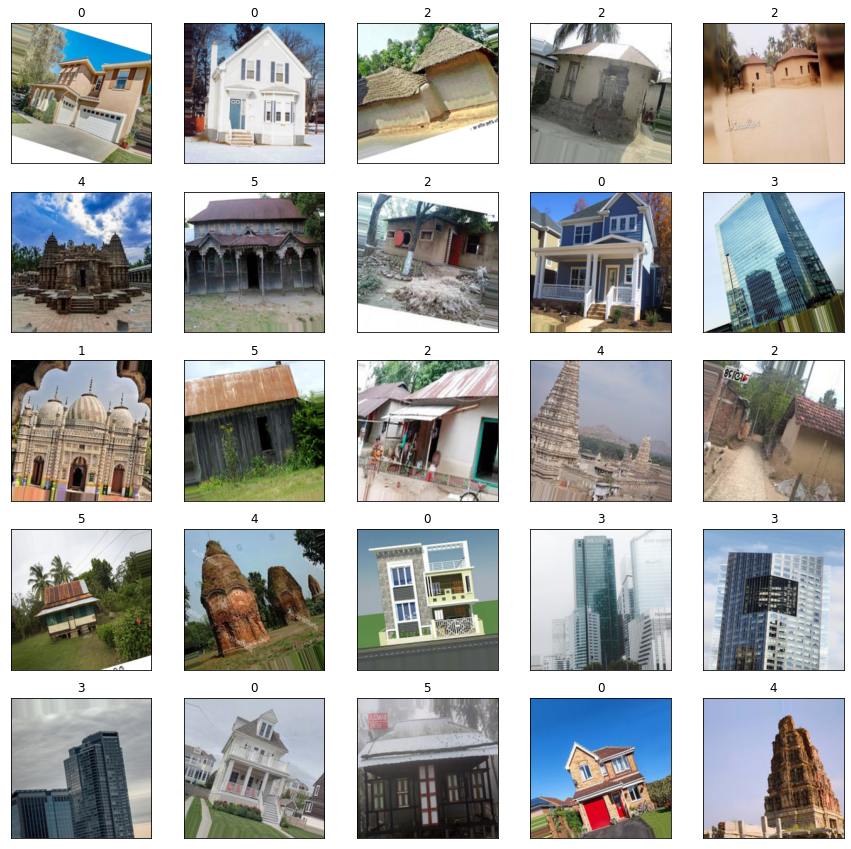

In [13]:
x,y=validation_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

## Import Library

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

## Create conv relu batchnorm  Block

In [15]:
def conv_relu_batchnorm(x, filters, kernel_size):
    x = layers.Conv2D(filters=filters,
               kernel_size=kernel_size,
               activation='relu',
               padding='same')(x)
    x = layers.BatchNormalization()(x)
    
    return x

## Define Concatenation Block

In [16]:
def layer_concate(tensor,filters):
    x=conv_relu_batchnorm(tensor,filters,kernel_size=3)
    x=layers.Concatenate()([x,tensor])
    return x

## Define Model Input

In [17]:
inputs=layers.Input(shape=(224,224,3))

## Inplement Model Architecture

In [18]:
total_class=6

In [19]:
x=conv_relu_batchnorm(inputs,filters=32,kernel_size=3)
x=layers.MaxPool2D(pool_size=(2,2))(x)
x=layer_concate(x,filters=64)

In [20]:
x=layers.MaxPool2D(pool_size=(3,3))(x)

In [21]:
x=conv_relu_batchnorm(x,filters=128,kernel_size=3)
x=layers.MaxPool2D(pool_size=(3,3))(x)
x=layer_concate(x,filters=256)
x=layers.MaxPool2D(pool_size=(3,3))(x)

In [22]:
x=conv_relu_batchnorm(x,filters=128,kernel_size=3)
x=layer_concate(x,filters=128)
x = layers.GlobalAveragePooling2D()(x)

In [23]:
x=layers.Dropout(0.5)(x)
x=layers.Flatten()(x)
x=layers.Dense(256,activation='relu')(x)

In [24]:
output=layers.Dense(total_class,activation='softmax')(x)

## Create Model

In [25]:
model=keras.Model(inputs,output,name='NewModel')

In [26]:
model.summary()

Model: "NewModel"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 224, 224, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 224, 224, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 112, 112, 32) 0           batch_normalization[0][0]        
___________________________________________________________________________________________

In [27]:
import time
print(time.time())

1625134146.174478


In [28]:
t=time.time()
image_name='/content/drive/MyDrive/CSE 4000 Thesis/Complex DNN Architecture/NewModelKUET'+str(int(t))+'.png'
image_name

'/content/drive/MyDrive/CSE 4000 Thesis/Complex DNN Architecture/NewModelKUET1625134146.png'

/content/drive/MyDrive/CSE 4000 Thesis/Complex DNN Architecture/NewModelKUET1625134146.png


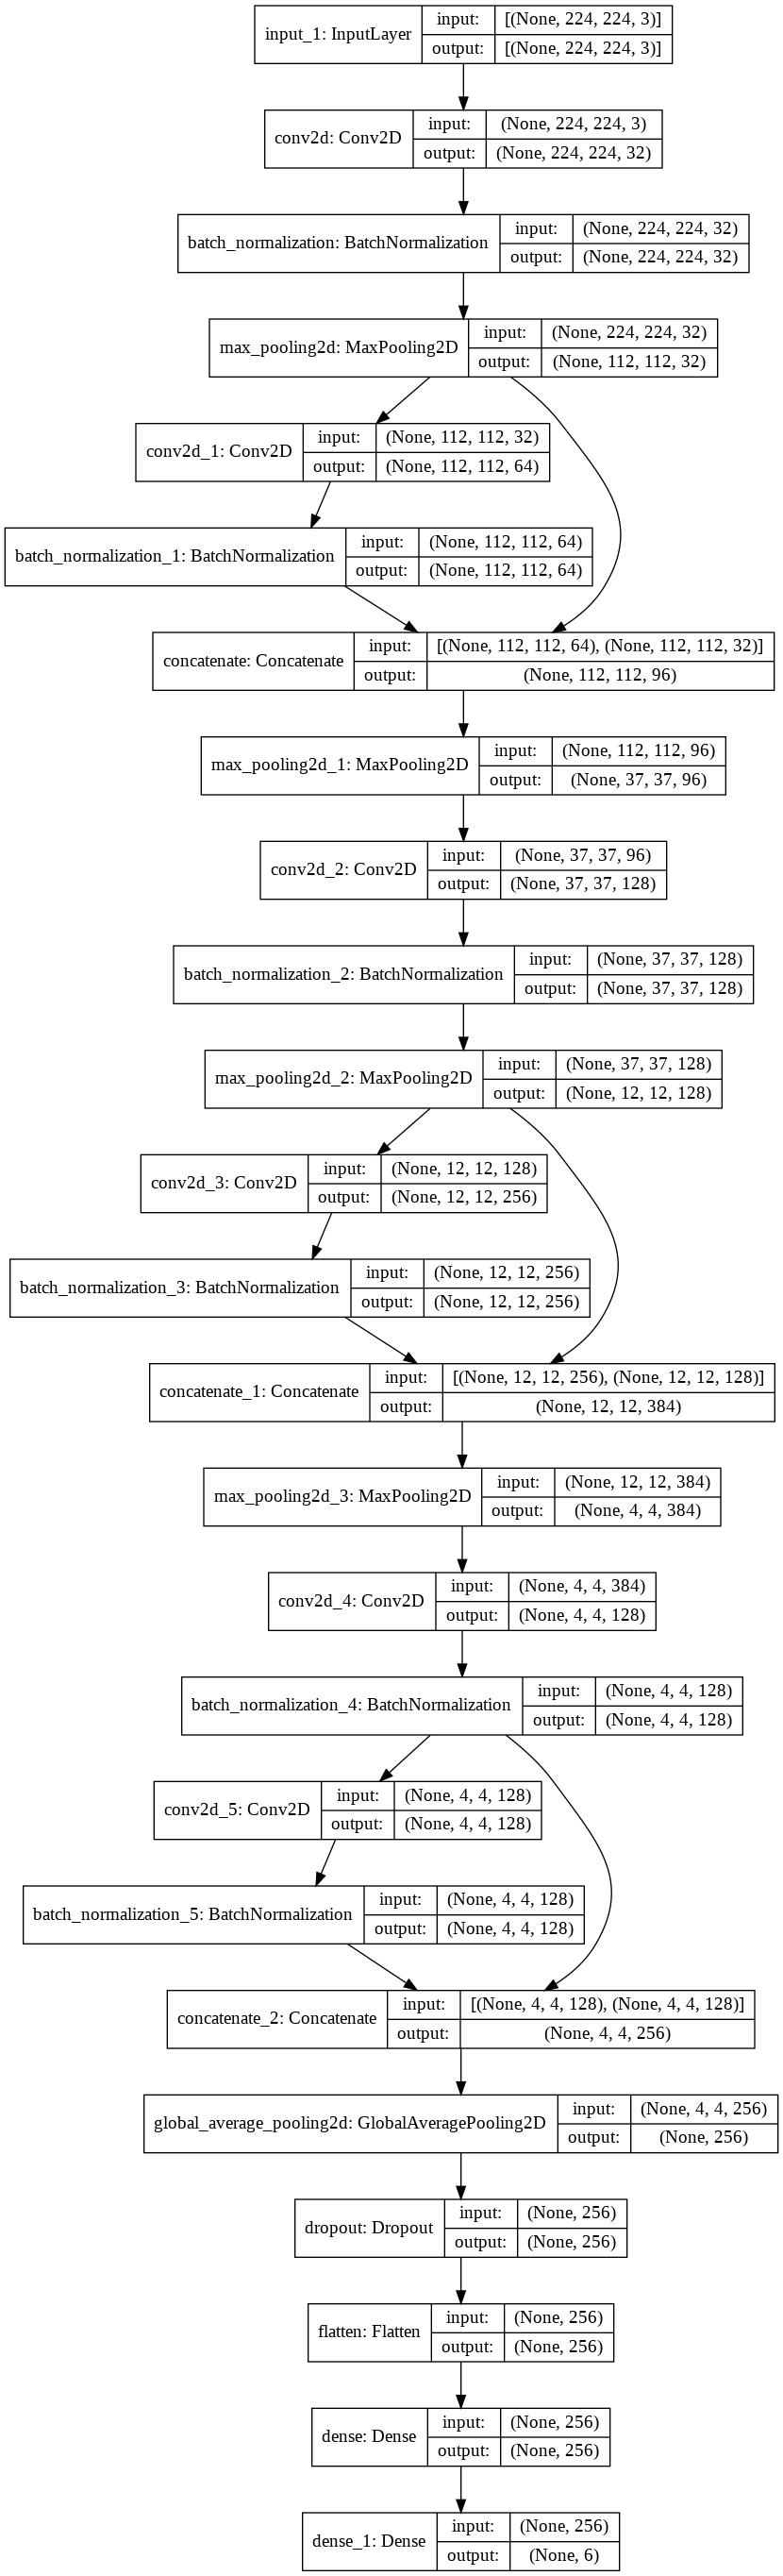

In [29]:
t=time.time()
image_name='/content/drive/MyDrive/CSE 4000 Thesis/Complex DNN Architecture/NewModelKUET'+str(int(t))+'.png'
print(image_name)
keras.utils.plot_model(model,show_shapes=True,to_file=image_name)

## Compile the Model

In [30]:
## Compile The Model 

In [31]:
model.compile(loss='categorical_crossentropy' ,
              optimizer='adam' ,
              metrics=['accuracy',
                       tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall(),
                       tf.keras.metrics.AUC()])

## Trained the Model

In [32]:
epochs=200
batch_size=32
trainset_length=len(train_dataset.labels)
validation_length=len(validation_dataset.labels)
steps_per_epoch=(trainset_length//batch_size)
validation_steps=(validation_length//batch_size)
print(trainset_length)
print(validation_length)
print(steps_per_epoch)
print(validation_steps)

960
240
30
7


In [33]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Keras/buildingCNN.model.best.hdf5', verbose=1 ,save_best_only=True)

In [34]:
history = model.fit(train_dataset,
                    steps_per_epoch = steps_per_epoch,
                    epochs=epochs,
                    validation_data=validation_dataset,
                    validation_steps=validation_steps,
                    callbacks=[checkpointer])

Epoch 1/200
30/30 [==============================] - 476s 15s/step - loss: 1.2526 - accuracy: 0.5115 - precision: 0.6768 - recall: 0.3250 - auc: 0.8382 - val_loss: 2.7127 - val_accuracy: 0.1741 - val_precision: 0.1741 - val_recall: 0.1741 - val_auc: 0.5358

Epoch 00001: val_loss improved from inf to 2.71269, saving model to /content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Keras/buildingCNN.model.best.hdf5
Epoch 2/200
30/30 [==============================] - 15s 491ms/step - loss: 0.9554 - accuracy: 0.6094 - precision: 0.7044 - recall: 0.4990 - auc: 0.9087 - val_loss: 2.4916 - val_accuracy: 0.1696 - val_precision: 0.2520 - val_recall: 0.1429 - val_auc: 0.5332

Epoch 00002: val_loss improved from 2.71269 to 2.49159, saving model to /content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Keras/buildingCNN.model.best.hdf5
Epoch 3/200
30/30 [==============================] - 15s 488ms/step - loss: 0.8110 - accuracy: 0.6792 - precision: 0.7584 - recall: 0.5854 - auc: 0.9334 - 

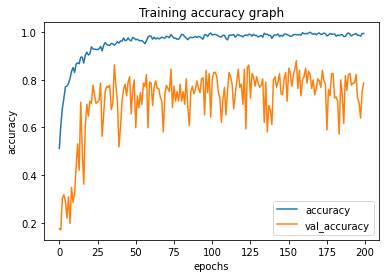

In [35]:
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training accuracy graph')
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

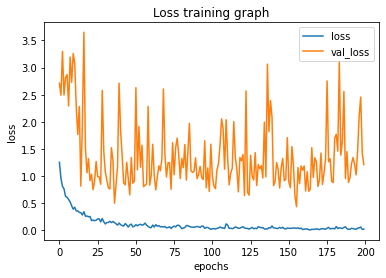

In [36]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss training graph')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()


In [1]:
plt.xlabel('epochs')
plt.ylabel('precision')
plt.title('Precision training graph')
plt.plot(history.history['precision'],label='precision')
plt.plot(history.history['val_precision'],label='val_precision')
plt.legend()
plt.show()

NameError: ignored

In [46]:
test_loss,test_accuracy,test_precision,test_recall,test_auc=model.evaluate(test_dataset)

10/10 [==============================] - 1s 118ms/step - loss: 1.8784 - accuracy: 0.7700 - precision: 0.7726 - recall: 0.7700 - auc: 0.9018


In [47]:
print('Accuracy of the model is : ',test_accuracy*100)
print('Loss of the model is : ',test_loss)
print('Precision of the model is : ',test_precision*100)
print('Recall of the model is : ',test_recall*100)
print('AUC of the model is : ',test_auc*100)

Accuracy of the model is :  76.99999809265137
Loss of the model is :  1.8783870935440063
Precision of the model is :  77.25752592086792
Recall of the model is :  76.99999809265137
AUC of the model is :  90.17778038978577


In [48]:
f1score=(2*test_precision*test_recall)/ (test_precision+test_recall)
print("F1 score: ",f1score*100)

F1 score:  77.12854703966896


## Saved Model

In [4]:
import time
t = time.time()

export_path_keras = "/content/drive/MyDrive/CSE 4000 Thesis/Complex DNN Architecture/NewModelKUET{}_model_{}.h5".format(test_accuracy,int(t))
print(export_path_keras)
model.save(export_path_keras)

NameError: ignored

In [10]:
export_path_keras= '/content/drive/MyDrive/CSE 4000 Thesis/Complex DNN Architecture/NewModelKUET0.7699999809265137_model_1625137984.h5'

In [8]:
from tensorflow.keras.models import load_model

In [11]:
model_path=export_path_keras
reload_model=load_model(model_path)
reload_model.summary()


OSError: ignored

## Classification Report

In [52]:
predicted_result=model.predict(test_dataset)
predicted_result[:5]

array([[4.9084779e-08, 9.9962890e-01, 2.5964623e-06, 8.9250330e-05,
        2.7544654e-04, 3.8059463e-06],
       [8.8598486e-03, 9.9073130e-01, 6.1294420e-05, 9.3360786e-06,
        3.7774749e-05, 3.0043954e-04],
       [9.5325547e-08, 9.4684883e-06, 7.8165787e-05, 9.8580039e-01,
        3.8404020e-03, 1.0271554e-02],
       [1.6591784e-09, 1.9396067e-08, 9.9991453e-01, 2.0684788e-06,
        2.4794253e-06, 8.0963495e-05],
       [3.3889020e-12, 2.7871247e-12, 9.9999976e-01, 4.7401204e-11,
        3.3857012e-10, 2.5992381e-07]], dtype=float32)

In [53]:
predicted_value=np.argmax(model.predict(test_dataset),axis=-1)
predicted_value

array([2, 2, 5, 1, 5, 1, 5, 1, 5, 4, 5, 1, 5, 2, 3, 2, 2, 2, 3, 5, 4, 5,
       2, 5, 2, 4, 4, 4, 5, 5, 5, 5, 5, 3, 4, 3, 5, 1, 0, 3, 4, 5, 5, 0,
       4, 5, 2, 4, 3, 1, 3, 4, 4, 0, 4, 1, 5, 5, 2, 4, 4, 3, 3, 5, 3, 3,
       3, 5, 2, 2, 4, 3, 1, 5, 2, 3, 2, 2, 5, 5, 5, 5, 4, 3, 0, 3, 2, 3,
       2, 3, 5, 2, 3, 2, 4, 5, 1, 5, 1, 1, 5, 5, 3, 2, 5, 3, 5, 3, 3, 1,
       2, 5, 1, 0, 4, 2, 3, 4, 5, 3, 2, 2, 3, 5, 2, 5, 5, 4, 1, 1, 5, 2,
       5, 5, 1, 1, 5, 5, 2, 2, 4, 4, 5, 2, 2, 2, 5, 5, 3, 5, 4, 5, 1, 5,
       4, 4, 2, 5, 5, 5, 2, 4, 2, 1, 4, 3, 4, 4, 5, 1, 5, 5, 2, 3, 4, 3,
       2, 5, 1, 3, 1, 5, 3, 1, 2, 5, 3, 1, 0, 3, 3, 2, 5, 0, 4, 4, 5, 5,
       5, 3, 3, 2, 2, 5, 5, 4, 3, 1, 2, 3, 4, 3, 3, 3, 5, 2, 5, 4, 2, 2,
       5, 3, 3, 5, 3, 3, 1, 1, 3, 4, 2, 1, 4, 4, 2, 2, 4, 2, 1, 1, 5, 4,
       2, 3, 3, 4, 2, 3, 4, 0, 3, 2, 5, 5, 2, 5, 2, 4, 2, 5, 4, 5, 5, 1,
       3, 1, 3, 1, 1, 2, 4, 4, 2, 1, 5, 1, 2, 5, 0, 2, 2, 4, 2, 5, 5, 2,
       5, 3, 3, 2, 4, 5, 5, 3, 3, 3, 3, 1, 4, 0])

In [54]:
test_value=test_dataset.classes
test_value

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], d

In [55]:
from sklearn.metrics import accuracy_score
print('Accuracy score: ',accuracy_score(test_dataset.classes,predicted_value))

Accuracy score:  0.17


In [56]:
from sklearn.metrics import classification_report
print('classification report \n',classification_report(test_dataset.classes,predicted_value))

classification report 
               precision    recall  f1-score   support

           0       0.20      0.04      0.07        50
           1       0.14      0.10      0.11        50
           2       0.19      0.24      0.21        50
           3       0.15      0.18      0.17        50
           4       0.20      0.20      0.20        50
           5       0.16      0.26      0.20        50

    accuracy                           0.17       300
   macro avg       0.17      0.17      0.16       300
weighted avg       0.17      0.17      0.16       300

